<a href="https://colab.research.google.com/github/sf-rahul/Tensorflow/blob/master/HackerearthChalane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0-rc2


In [0]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, \
  preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [0]:
!unzip -qq -o dataset.zip

In [27]:
!ls

dataset  dataset.zip  sample_data


In [28]:
!ls dataset/TrainImages/


te0_image10006.jpg  tr0_image1911.jpg  tr0_image9795.jpg   tr2_image1834.jpg
te0_image1002.jpg   tr0_image1912.jpg  tr0_image9796.jpg   tr2_image1835.jpg
te0_image10060.jpg  tr0_image1914.jpg  tr0_image9797.jpg   tr2_image1836.jpg
te0_image10078.jpg  tr0_image191.jpg   tr0_image9798.jpg   tr2_image1838.jpg
te0_image10095.jpg  tr0_image1921.jpg  tr0_image9803.jpg   tr2_image1892.jpg
te0_image10120.jpg  tr0_image192.jpg   tr0_image9807.jpg   tr2_image1893.jpg
te0_image10135.jpg  tr0_image1933.jpg  tr0_image9810.jpg   tr2_image189.jpg
te0_image10175.jpg  tr0_image1935.jpg  tr0_image9812.jpg   tr2_image1947.jpg
te0_image10181.jpg  tr0_image1936.jpg  tr0_image9813.jpg   tr2_image1973.jpg
te0_image10185.jpg  tr0_image193.jpg   tr0_image9817.jpg   tr2_image1998.jpg
te0_image10188.jpg  tr0_image1941.jpg  tr0_image9819.jpg   tr2_image200.jpg
te0_image10198.jpg  tr0_image1953.jpg  tr0_image9820.jpg   tr2_image2036.jpg
te0_image10203.jpg  tr0_image1957.jpg  tr0_image9821.jpg   tr2_image2070.jpg
t

In [29]:
!ls dataset/TestImages

image10001.jpg	image2207.jpg  image4355.jpg  image6266.jpg  image8150.jpg
image10005.jpg	image2216.jpg  image4362.jpg  image6267.jpg  image8156.jpg
image10008.jpg	image2217.jpg  image4363.jpg  image6269.jpg  image8164.jpg
image10009.jpg	image2220.jpg  image4373.jpg  image6271.jpg  image8165.jpg
image10010.jpg	image2221.jpg  image4375.jpg  image6272.jpg  image8167.jpg
image10012.jpg	image2226.jpg  image4376.jpg  image6278.jpg  image8169.jpg
image10014.jpg	image2233.jpg  image4377.jpg  image6282.jpg  image8174.jpg
image10023.jpg	image2237.jpg  image4381.jpg  image6285.jpg  image8175.jpg
image10024.jpg	image2238.jpg  image4382.jpg  image6286.jpg  image8177.jpg
image10026.jpg	image2242.jpg  image4387.jpg  image6288.jpg  image8178.jpg
image10027.jpg	image2243.jpg  image438.jpg   image6294.jpg  image8183.jpg
image10028.jpg	image2252.jpg  image4392.jpg  image6297.jpg  image8187.jpg
image10031.jpg	image2253.jpg  image4393.jpg  image6305.jpg  image818.jpg
image10037.jpg	image2256.jpg  image4399

In [0]:
import pandas as pd
train_csv = pd.read_csv('dataset/train.csv')
test_csv = pd.read_csv('dataset/test.csv')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(train_csv,  test_size=0.2, random_state=1)

In [32]:
X_test

,Image,Class
3159,image4707.jpg,Attire
795,image9827.jpg,misc
4489,image8322.jpg,Food
5781,image8426.jpg,Food
2929,image2346.jpg,Attire
...,...,...
4818,image10234.jpg,Attire
1764,image6799.jpg,Attire
5568,image10078.jpg,Food
3539,image7679.jpg,Food


In [33]:
train_csv.loc[train_csv['Image'] == 'image273.jpg']['Class']

5365    Food
Name: Class, dtype: object

In [34]:
X_train.loc[X_train['Image']=='image273.jpg']['Class'].empty

False

In [0]:
import cv2
import os
import glob

In [0]:
data=[]
def classifyTheImages(img_dir,type,data_csv):
  #img_dir = "dataset/TrainImages" # Enter Directory of all images 
  data_path = os.path.join(img_dir,'*g')
  files = glob.glob(data_path)
  #data = []
  for f1 in files:
    print(cv2.imread(f1).shape)
    #print(f1.split('/')[2])
    filename= f1.split('/')[2]
    if data_csv.loc[data_csv['Image'] == filename]['Class'].empty==False:
      className = data_csv.loc[data_csv['Image'] == filename]['Class'].item()
      if className == 'Food':
        filename = type+'0'+'_'+filename;
        data.append(filename)
      elif className=='Attire':
        filename=type+'1'+'_'+filename;
        data.append(filename)
      elif className == 'Decorationandsignage':
        filename=type+'2'+'_'+filename;
        data.append(filename)
      elif className=='misc':
        filename=type+'3'+'_'+filename;
        data.append(filename)
      os.rename(r''+ f1,r''+img_dir+'/'+filename)



In [37]:
classifyTheImages("dataset/TrainImages",'tr',X_train)


Streaming output truncated to the last 5000 lines.
(120, 80, 3)
(80, 80, 3)
(48, 80, 3)
(60, 80, 3)
(107, 80, 3)
(120, 80, 3)
(60, 80, 3)
(119, 80, 3)
(102, 80, 3)
(53, 80, 3)
(60, 80, 3)
(60, 80, 3)
(50, 80, 3)
(80, 80, 3)
(120, 80, 3)
(48, 80, 3)
(54, 80, 3)
(92, 80, 3)
(53, 80, 3)
(80, 80, 3)
(108, 80, 3)
(71, 80, 3)
(60, 80, 3)
(53, 80, 3)
(60, 80, 3)
(107, 80, 3)
(107, 80, 3)
(107, 80, 3)
(93, 80, 3)
(60, 80, 3)
(84, 80, 3)
(60, 80, 3)
(120, 80, 3)
(53, 80, 3)
(80, 80, 3)
(53, 80, 3)
(104, 80, 3)
(45, 80, 3)
(60, 80, 3)
(54, 80, 3)
(53, 80, 3)
(60, 80, 3)
(120, 80, 3)
(53, 80, 3)
(60, 80, 3)
(107, 80, 3)
(53, 80, 3)
(129, 80, 3)
(120, 80, 3)
(60, 80, 3)
(80, 80, 3)
(63, 80, 3)
(73, 80, 3)
(119, 80, 3)
(54, 80, 3)
(60, 80, 3)
(51, 80, 3)
(60, 80, 3)
(53, 80, 3)
(117, 80, 3)
(107, 80, 3)
(53, 80, 3)
(110, 80, 3)
(80, 80, 3)
(53, 80, 3)
(61, 80, 3)
(107, 80, 3)
(69, 80, 3)
(60, 80, 3)
(120, 80, 3)
(54, 80, 3)
(107, 80, 3)
(120, 80, 3)
(60, 80, 3)
(93, 80, 3)
(60, 80, 3)
(94, 80, 3)
(

In [38]:
classifyTheImages("dataset/TrainImages","te",X_test)

Streaming output truncated to the last 5000 lines.
(120, 80, 3)
(80, 80, 3)
(48, 80, 3)
(60, 80, 3)
(107, 80, 3)
(120, 80, 3)
(60, 80, 3)
(119, 80, 3)
(102, 80, 3)
(53, 80, 3)
(60, 80, 3)
(60, 80, 3)
(50, 80, 3)
(80, 80, 3)
(120, 80, 3)
(48, 80, 3)
(54, 80, 3)
(92, 80, 3)
(53, 80, 3)
(80, 80, 3)
(108, 80, 3)
(71, 80, 3)
(60, 80, 3)
(53, 80, 3)
(60, 80, 3)
(107, 80, 3)
(107, 80, 3)
(107, 80, 3)
(93, 80, 3)
(60, 80, 3)
(84, 80, 3)
(60, 80, 3)
(120, 80, 3)
(53, 80, 3)
(80, 80, 3)
(53, 80, 3)
(104, 80, 3)
(45, 80, 3)
(60, 80, 3)
(54, 80, 3)
(53, 80, 3)
(60, 80, 3)
(120, 80, 3)
(53, 80, 3)
(60, 80, 3)
(107, 80, 3)
(53, 80, 3)
(129, 80, 3)
(120, 80, 3)
(60, 80, 3)
(80, 80, 3)
(63, 80, 3)
(73, 80, 3)
(119, 80, 3)
(54, 80, 3)
(60, 80, 3)
(51, 80, 3)
(60, 80, 3)
(53, 80, 3)
(117, 80, 3)
(107, 80, 3)
(53, 80, 3)
(110, 80, 3)
(80, 80, 3)
(53, 80, 3)
(61, 80, 3)
(107, 80, 3)
(69, 80, 3)
(60, 80, 3)
(120, 80, 3)
(54, 80, 3)
(107, 80, 3)
(120, 80, 3)
(60, 80, 3)
(93, 80, 3)
(60, 80, 3)
(94, 80, 3)
(

In [40]:
data

[]

In [0]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [0]:
!mkdir data/train
!mkdir data/test

mkdir: cannot create directory ‘data/train’: File exists
mkdir: cannot create directory ‘data/test’: File exists


In [0]:
!mkdir data/train/Food
!mkdir data/train/Attire
!mkdir data/train/Decorationandsignage
!mkdir data/train/misc

mkdir: cannot create directory ‘data/train/Food’: File exists
mkdir: cannot create directory ‘data/train/Attire’: File exists
mkdir: cannot create directory ‘data/train/Decorationandsignage’: File exists
mkdir: cannot create directory ‘data/train/misc’: File exists


In [0]:
!mkdir data/test/Food
!mkdir data/test/Attire
!mkdir data/test/Decorationandsignage
!mkdir data/test/misc

mkdir: cannot create directory ‘data/test/Food’: File exists
mkdir: cannot create directory ‘data/test/Attire’: File exists
mkdir: cannot create directory ‘data/test/Decorationandsignage’: File exists
mkdir: cannot create directory ‘data/test/misc’: File exists


In [0]:
!mv dataset/TrainImages/tr0*.jpg data/train/Food
!mv dataset/TrainImages/tr1*.jpg data/train/Attire
!mv dataset/TrainImages/tr2*.jpg data/train/Decorationandsignage
!mv dataset/TrainImages/tr3*.jpg data/train/misc

!mv dataset/TrainImages/te0*.jpg data/test/Food
!mv dataset/TrainImages/te1*.jpg data/test/Attire
!mv dataset/TrainImages/te2*.jpg data/test/Decorationandsignage
!mv dataset/TrainImages/te3*.jpg data/test/misc


mv: cannot stat 'dataset/TrainImages/tr0*.jpg': No such file or directory
mv: cannot stat 'dataset/TrainImages/tr1*.jpg': No such file or directory
mv: cannot stat 'dataset/TrainImages/tr2*.jpg': No such file or directory
mv: cannot stat 'dataset/TrainImages/tr3*.jpg': No such file or directory
mv: cannot stat 'dataset/TrainImages/te0*.jpg': No such file or directory
mv: cannot stat 'dataset/TrainImages/te1*.jpg': No such file or directory
mv: cannot stat 'dataset/TrainImages/te2*.jpg': No such file or directory
mv: cannot stat 'dataset/TrainImages/te3*.jpg': No such file or directory


In [0]:
train_path = 'data/train'
valid_path = 'data/test'

In [0]:
IMAGE_SIZE = [200, 200]

In [0]:
# useful for getting number of files
import glob
image_files = glob.glob(train_path + '/*/*.jpg')
valid_image_files = glob.glob(valid_path + '/*/*.jpg')

In [0]:
folders = glob.glob(train_path + '/*')
folders

['data/train/misc',
 'data/train/Food',
 'data/train/Decorationandsignage',
 'data/train/Attire']

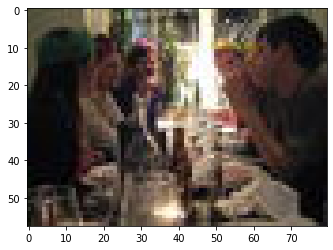

In [0]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [0]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights="imagenet",
    include_top=False
)

In [0]:
ptm.trainable=False

In [0]:
K = len(folders)
X = Flatten()(ptm.output)
X = Dense(K,activation='softmax')(X)



In [0]:
model = Model(inputs=ptm.input,outputs=X)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [0]:
gen_train = ImageDataGenerator(
    rotation_range =20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

gen_test = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [0]:
batch_size = 128
train_generator = gen_train.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=IMAGE_SIZE,
    batch_size=batch_size
)
valid_generator = gen_test.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)

Found 4786 images belonging to 4 classes.
Found 1197 images belonging to 4 classes.


In [0]:
import tensorflow_addons as tfa

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[tfa.metrics.F1Score(num_classes=K,average='weighted')])

In [0]:
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=10,
  steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
  validation_steps=int(np.ceil(len(valid_image_files) / batch_size)),
)

Epoch 1/10
38/38 [==============================] - 71s 2s/step - loss: 7.1055 - f1_score: 0.5942 - val_loss: 6.6446 - val_f1_score: 0.6317
Epoch 2/10
38/38 [==============================] - 64s 2s/step - loss: 4.4739 - f1_score: 0.6988 - val_loss: 5.9250 - val_f1_score: 0.6588
Epoch 3/10
38/38 [==============================] - 63s 2s/step - loss: 4.2439 - f1_score: 0.7243 - val_loss: 5.9857 - val_f1_score: 0.6684
Epoch 4/10
38/38 [==============================] - 64s 2s/step - loss: 3.8277 - f1_score: 0.7406 - val_loss: 6.2881 - val_f1_score: 0.6916
Epoch 5/10
38/38 [==============================] - 63s 2s/step - loss: 3.7056 - f1_score: 0.7503 - val_loss: 6.8552 - val_f1_score: 0.6648
Epoch 6/10
38/38 [==============================] - 63s 2s/step - loss: 3.6224 - f1_score: 0.7583 - val_loss: 7.7890 - val_f1_score: 0.6542
Epoch 7/10
38/38 [==============================] - 63s 2s/step - loss: 3.6286 - f1_score: 0.7643 - val_loss: 8.2561 - val_f1_score: 0.6658
Epoch 8/10
38/38 [==

In [0]:
!mkdir ./checkpoints/my_checkpoint

mkdir: cannot create directory ‘./checkpoints/my_checkpoint’: No such file or directory


In [0]:
model.save_weights('./checkpoints/my_checkpoint')

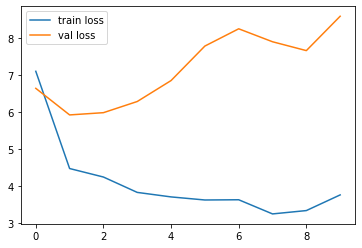

In [0]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

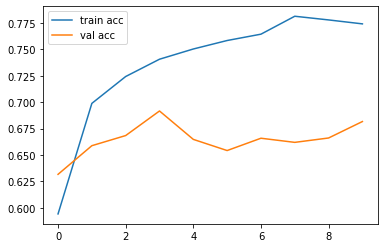

In [0]:
plt.plot(r.history['f1_score'], label='train acc')
plt.plot(r.history['val_f1_score'], label='val acc')
plt.legend()
plt.show()

In [0]:
import PIL.Image as pil_image

In [0]:
size = 200,200,3
img_dir='dataset/TestImages'
data_path = os.path.join(img_dir,'*g')
file_names = glob.glob(data_path)


In [0]:
for infile in test_csv['Image']:
  print(infile)
  outfile = img_dir+'/'+infile
  try:
      im = pil_image.open(img_dir+'/'+infile)
      im.thumbnail(size, pil_image.ANTIALIAS)
      im.save(outfile, "JPEG")
  except IOError:
        print (f"Error generating {infile}")

image6245.jpg
image10409.jpg
image8692.jpg
image10517.jpg
image2580.jpg
image848.jpg
image1232.jpg
image8386.jpg
image9828.jpg
image9033.jpg
image2857.jpg
image7838.jpg
image6337.jpg
image3608.jpg
image9190.jpg
image8586.jpg
image8140.jpg
image8208.jpg
image1052.jpg
image3926.jpg
image3726.jpg
image1491.jpg
image1572.jpg
image3925.jpg
image4858.jpg
image1498.jpg
image6432.jpg
image6175.jpg
image4756.jpg
image9174.jpg
image7285.jpg
image5797.jpg
image3666.jpg
image5597.jpg
image5663.jpg
image9985.jpg
image7108.jpg
image3064.jpg
image1781.jpg
image9617.jpg
image7924.jpg
image5861.jpg
image4276.jpg
image7252.jpg
image5331.jpg
image8666.jpg
image5984.jpg
image401.jpg
image3483.jpg
image10088.jpg
image6596.jpg
image318.jpg
image802.jpg
image6218.jpg
image4565.jpg
image37.jpg
image2372.jpg
image7920.jpg
image3571.jpg
image5368.jpg
image753.jpg
image10123.jpg
image2107.jpg
image1871.jpg
image2731.jpg
image10828.jpg
image217.jpg
image10788.jpg
image8563.jpg
image5125.jpg
image2719.jpg
image691

In [0]:
img_dir = "dataset/TestImages" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data=img

In [0]:
x,y,z = data.shape


In [0]:
import numpy as np
data=np.pad(data,(200))
data = np.expand_dims(data,axis=0)

In [0]:
data.shape

(1, 280, 240, 163)

In [0]:
data = preprocess_input(data)

In [0]:
model.predict(data)

ValueError: ignored